<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_12***


---


Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1.Measure accuracy of your model using different kernels such as rbf and linear.

2.Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score

3.Use 80% of samples as training data size

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()

In [35]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [36]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [38]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
digits.data.shape

(1797, 64)

In [41]:
digits.target.shape

(1797,)

In [42]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [43]:
df['target'] = digits.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [45]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.144672,0.001828,NaN,0.020895,-0.071784,-0.183403,-0.181357,0.018534,0.023764,NaN,0.031133,0.042396,0.144650,-0.225523,-0.257238,0.325224,0.385285,0.065117,0.018501,0.078370,0.276738,-0.230884,0.062677,0.584631,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
61,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,-0.031067,-0.095718,-0.002852,-0.131565,-0.279800,-0.136796,0.012376,0.052271,-0.016898,0.077486,0.103847,-0.078995,-0.224470,-0.107306,-0.038275,-0.150601,-0.114

In [44]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.00000

# Visualization

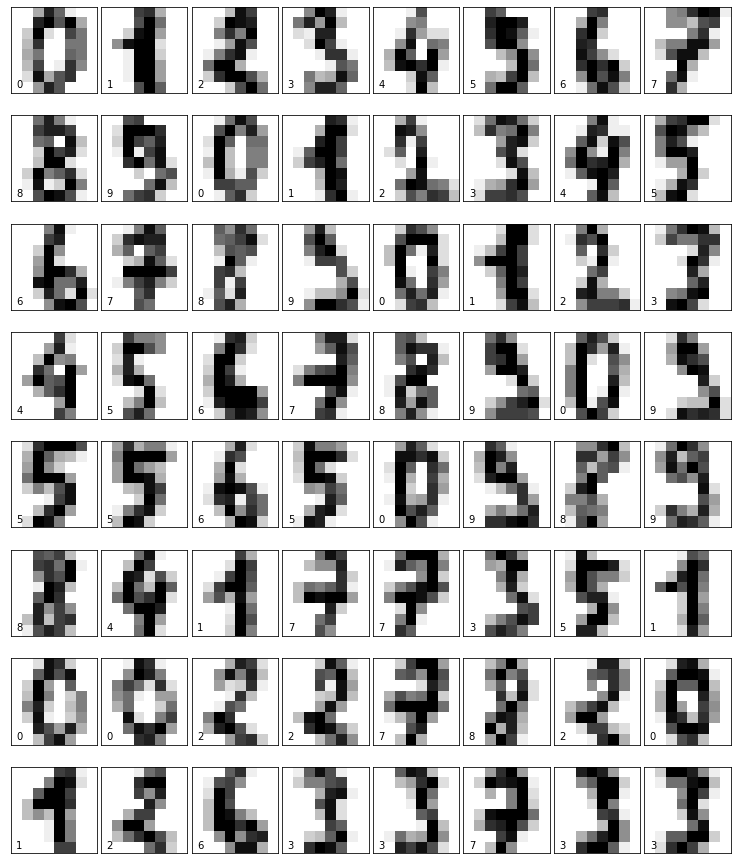

In [52]:
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
  ax = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]))

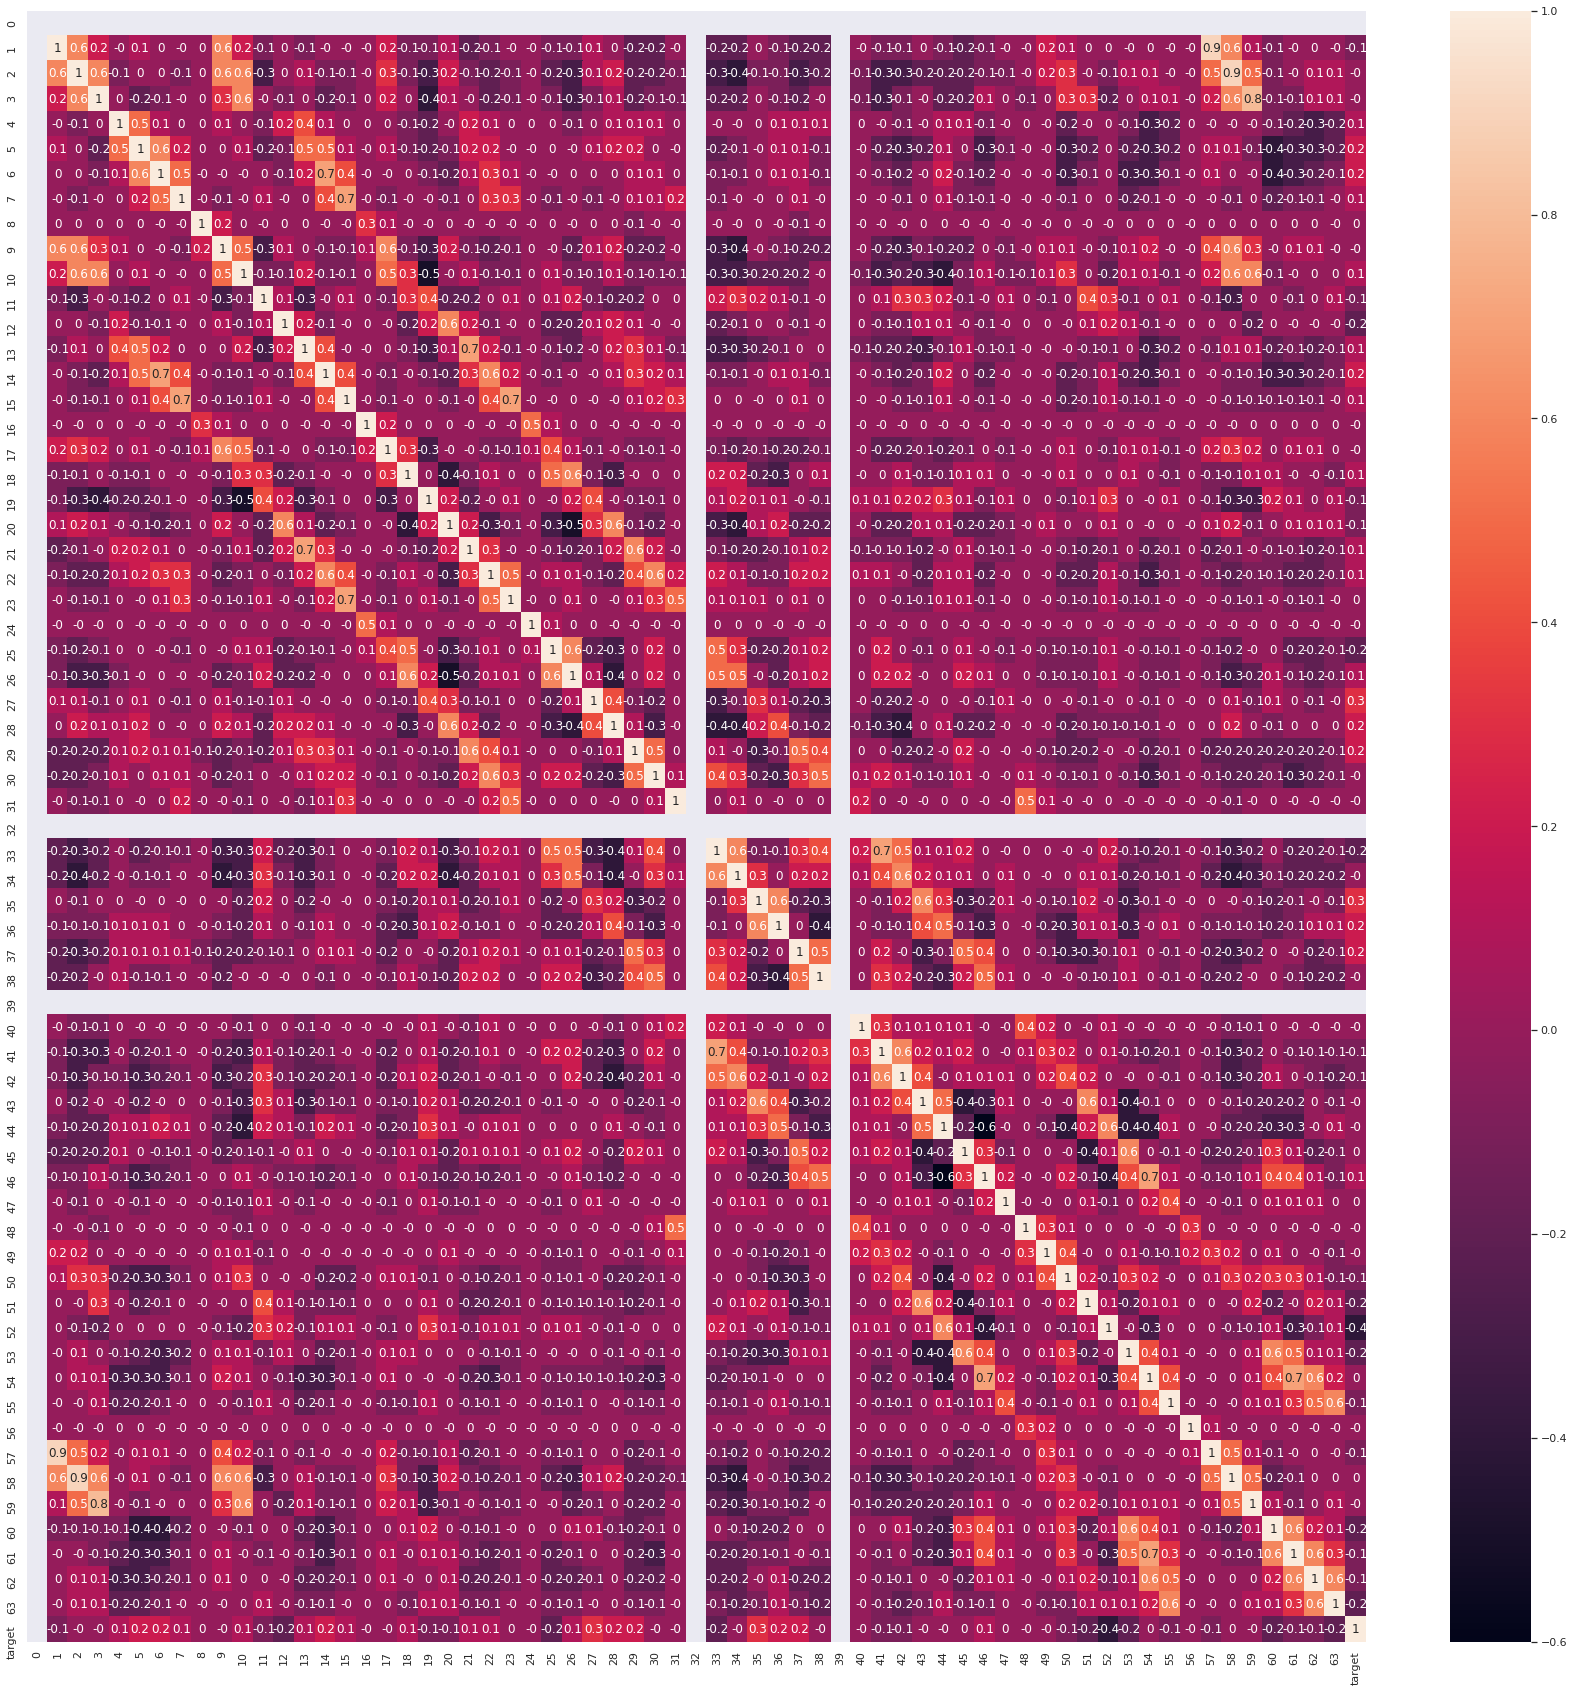

In [55]:
sns.set(rc={'figure.figsize':(30,30)})
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

# Splitting the Data into Dependent and Indpendent variables

In [56]:
x = df.drop('target',axis='columns')
y = df.target

# Training and Testing the Data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

# Support Vector Machine

In [59]:
from sklearn.svm import SVC

In [60]:
model = SVC()

In [61]:
model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction

In [62]:
ypred = model.predict(xtest)

# Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
cm = np.array(confusion_matrix(ytest, ypred))
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 27]])

Text(0.5, 30.5, 'Predicted label')

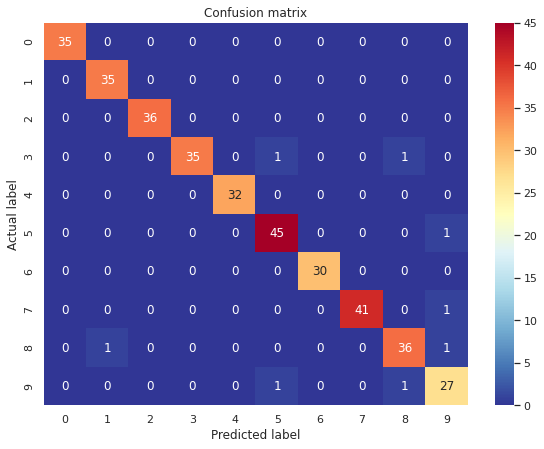

In [127]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlBu_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=5.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Accuracy

In [101]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest, ypred)
ac

0.9777777777777777

In [103]:
model.score(xtest, ytest)

0.9777777777777777

In [104]:
model_c = SVC(C=10)
model_c.fit(xtrain, ytrain)
model_c.score(xtest, ytest)

0.9861111111111112

# Kernel

In [125]:
model_linear = SVC(kernel='linear', C=0.005,probability=True )
model_linear.fit(xtrain, ytrain)
model_linear.score(xtest, ytest)

0.9777777777777777

In [126]:
model_rbf = SVC(kernel='rbf', gamma=0.002,probability=True)
model_rbf.fit(xtrain, ytrain)
model_rbf.score(xtest, ytest)

0.9805555555555555



---

